In [1]:
# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

# увеличим дефолтный размер графиков
from pylab import rcParams

rcParams["figure.figsize"] = 8, 5
import pandas as pd

## Тема 2. Виазуальный анализ данных с Pythno.


### Часть 1. Обзор библиотек Seaborn, Matplotlib и Plotly.

In [2]:
df = pd.read_csv("data/video_games_sales.csv").dropna()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
df["User_Score"] = df.User_Score.astype("float64")
df["Year_of_Release"] = df.Year_of_Release.astype("int64")
df["User_Count"] = df.User_Count.astype("int64")
df["Critic_Count"] = df.Critic_Count.astype("int64")

In [5]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


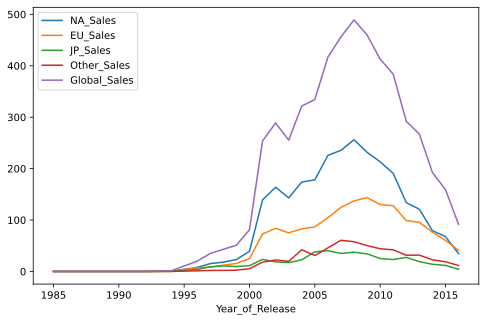

In [6]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot();

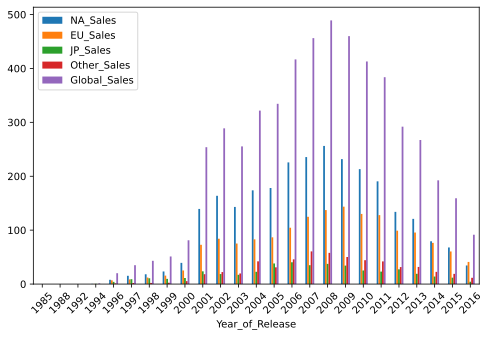

In [7]:
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45);

#### Seaborn

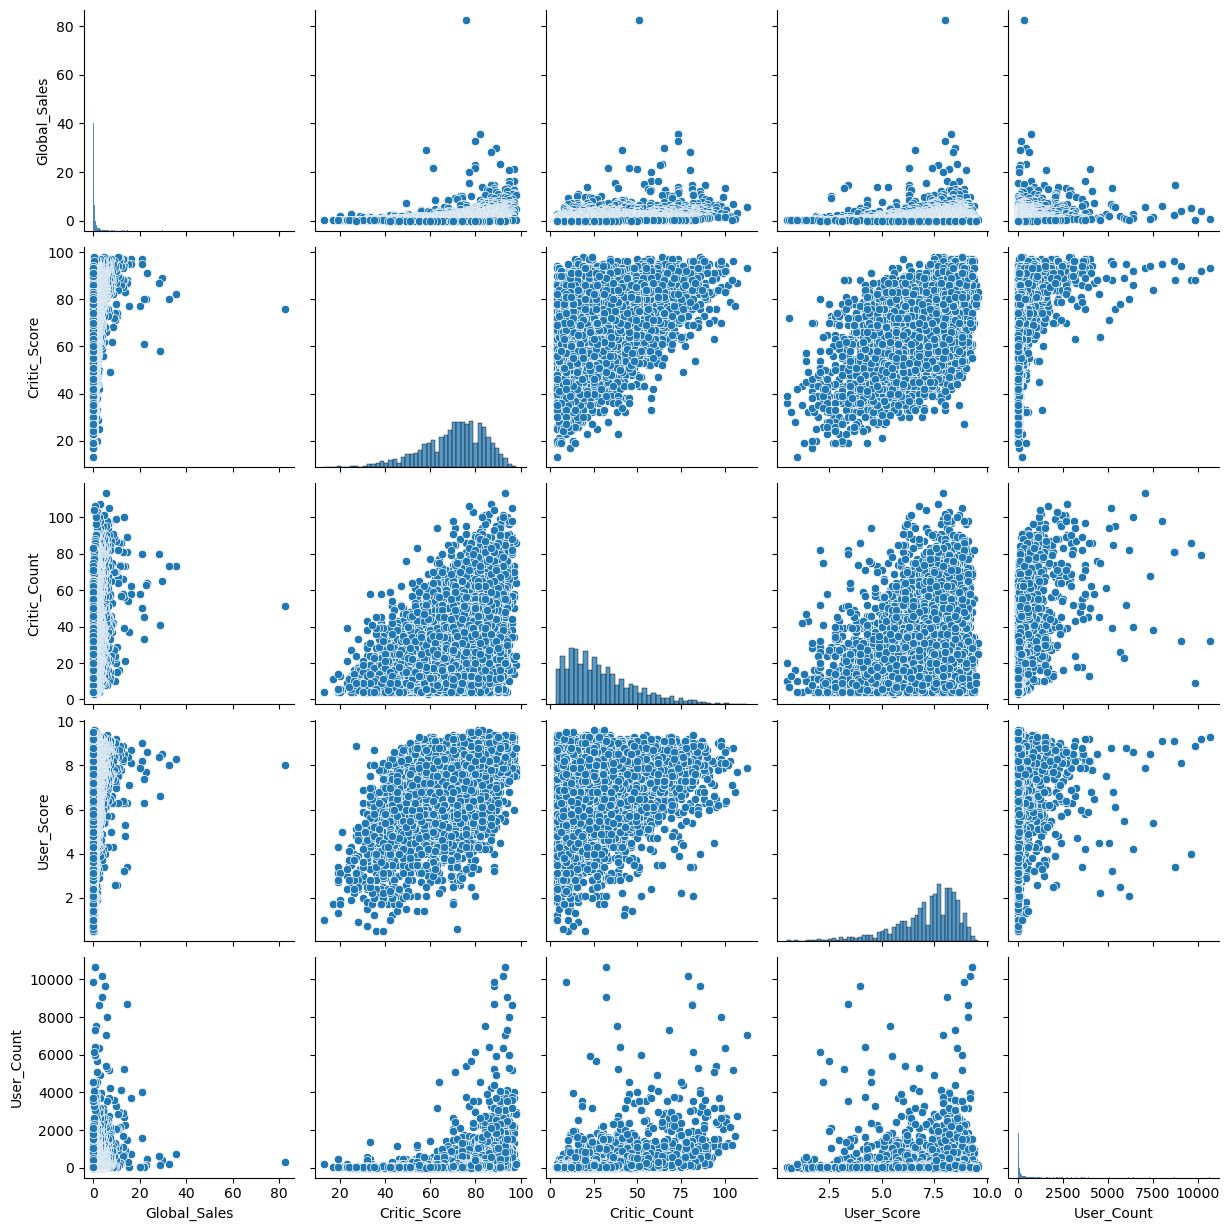

In [8]:
# c svg pairplot браузер начинает тормозить
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

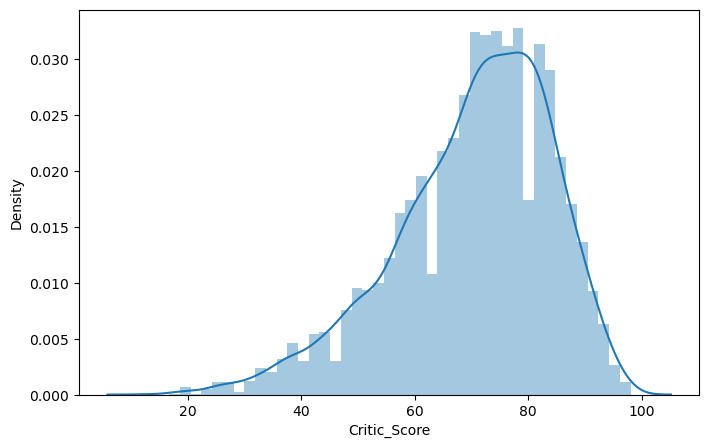

In [9]:
sns.distplot(df.Critic_Score);

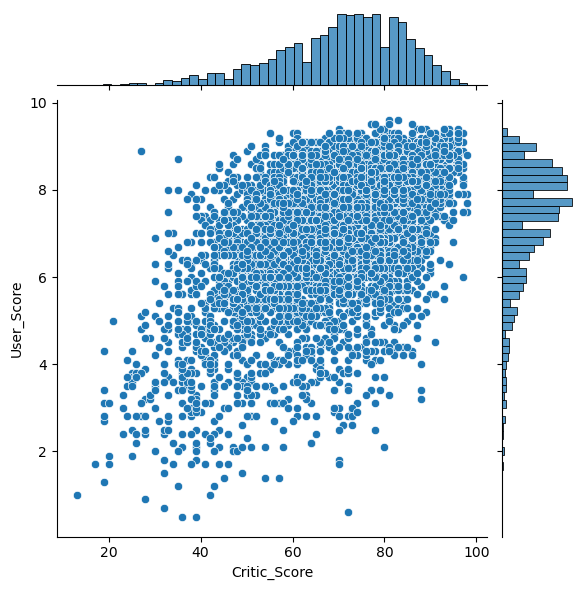

In [10]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter');

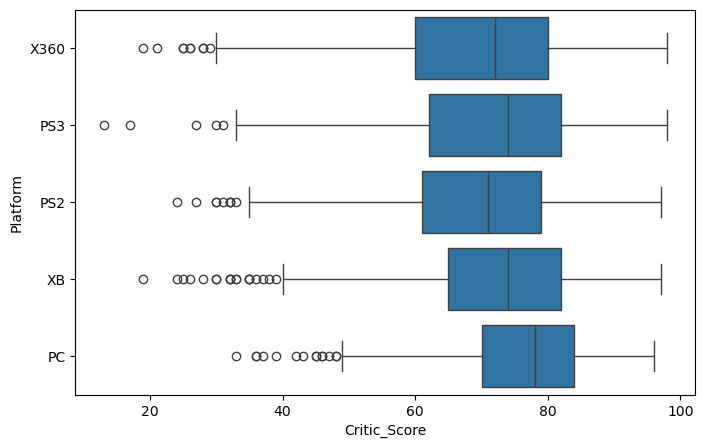

In [11]:
top_platforms = (
    df.Platform.value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform", x="Critic_Score", data=df[df.Platform.isin(top_platforms)], orient="h"
);

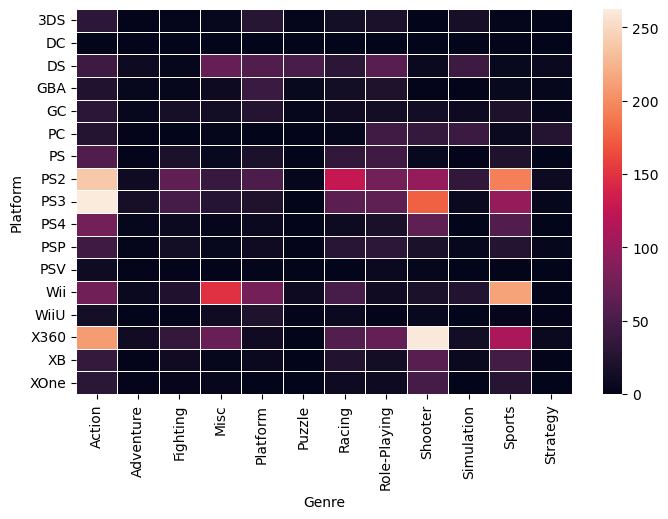

In [12]:
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
);
sns.heatmap(platform_genre_sales,  fmt='.1f', linewidths=0.5);

#### Plotly

In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

init_notebook_mode(connected=True)

In [14]:
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]

In [15]:
trace0 = go.Scatter(x=years_df.index, y=years_df.Global_Sales, name="Global Sales")

trace1 = go.Scatter(
    x=years_df.index, y=years_df.Number_of_Games, name="Number of games released"
)

data = [trace0, trace1]
layout = {"title": "Statistics of video games"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [16]:
platforms_df = (
    df.groupby('Platform')[['Global_Sales']]
    .sum()
    .join(df.groupby('Platform')[['Name']].count()))

platforms_df.columns = ["Global_Sales", "Number_of_Games"]
platforms_df.sort_values("Global_Sales", ascending=False, inplace=True)

In [17]:
trace0 = go.Bar(x=platforms_df.index, y=platforms_df.Global_Sales, name='Global_Sales')

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games'
)

data = [trace0, trace1]
layout = {'title': "Share of platforms"}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [18]:
data = []
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df['Genre'] == genre].Critic_Score, name=genre))
    
iplot(data, show_link=False)

### Часть 2. Пример визуального анализа данных.

In [19]:
from __future__ import division, print_function

# отключим всякие предупреждения Anaconda
import warnings

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

pd.set_option("display.max.columns", 100)
import pylab as plt

%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (10, 8)

In [20]:
df = pd.read_csv('data/telecom_churn.csv')


In [21]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Целевая переменная: Churn – Признак оттока, бинарный (1 – потеря клиента, то есть отток). Потом мы будем строить модели, прогнозирующие этот признак по остальным, поэтому мы и назвали его целевым.

In [23]:
df['Churn'].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

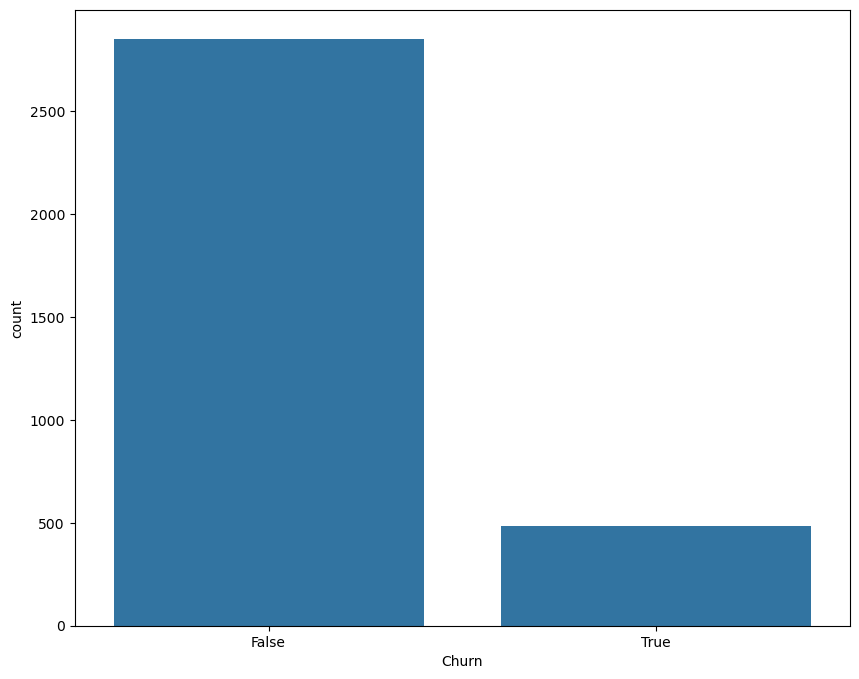

In [24]:
sns.countplot(x='Churn', data=df);


Выделим следующие группы признаков (среди всех кроме Churn ):

* бинарные: International plan, Voice mail plan
* категориальные: State
* порядковые: Customer service calls
* количественные: все остальные

Посмотрим на корреляции количественных признаков. По раскрашенной матрице корреляций видно, что такие признаки как Total day charge считаются по проговоренным минутам (Total day minutes). То есть 4 признака можно выкинуть, они не несут полезной информации.

In [25]:
corr_matrix = df.drop(
    ["State", "International plan", "Voice mail plan", "Area code"], axis=1
).corr()

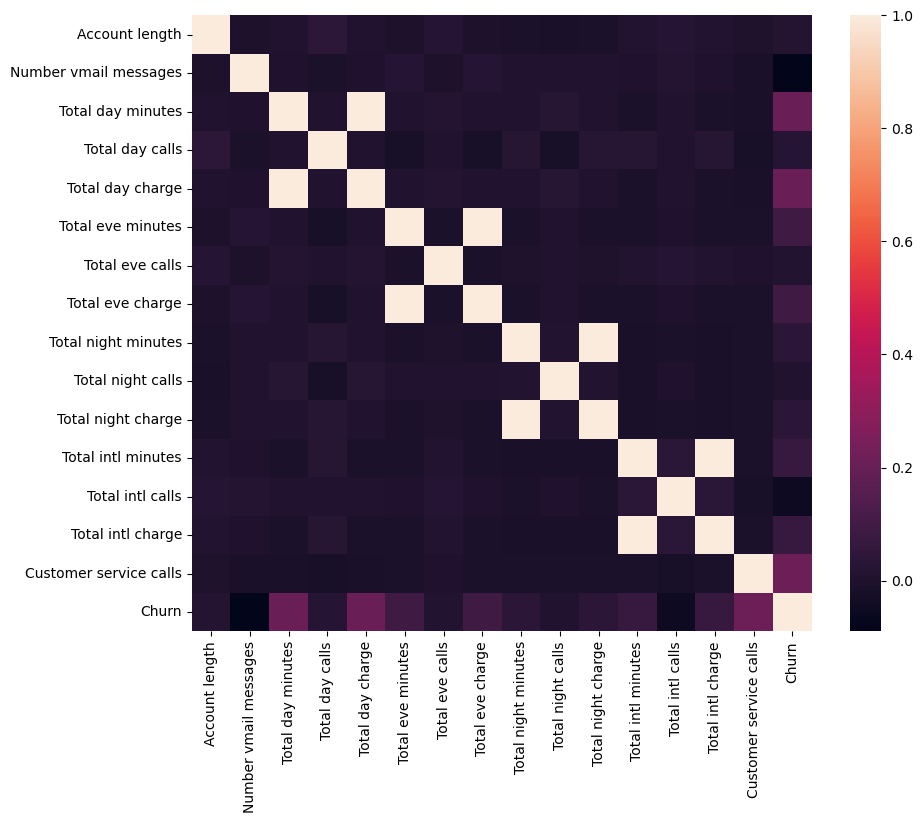

In [26]:
sns.heatmap(corr_matrix);

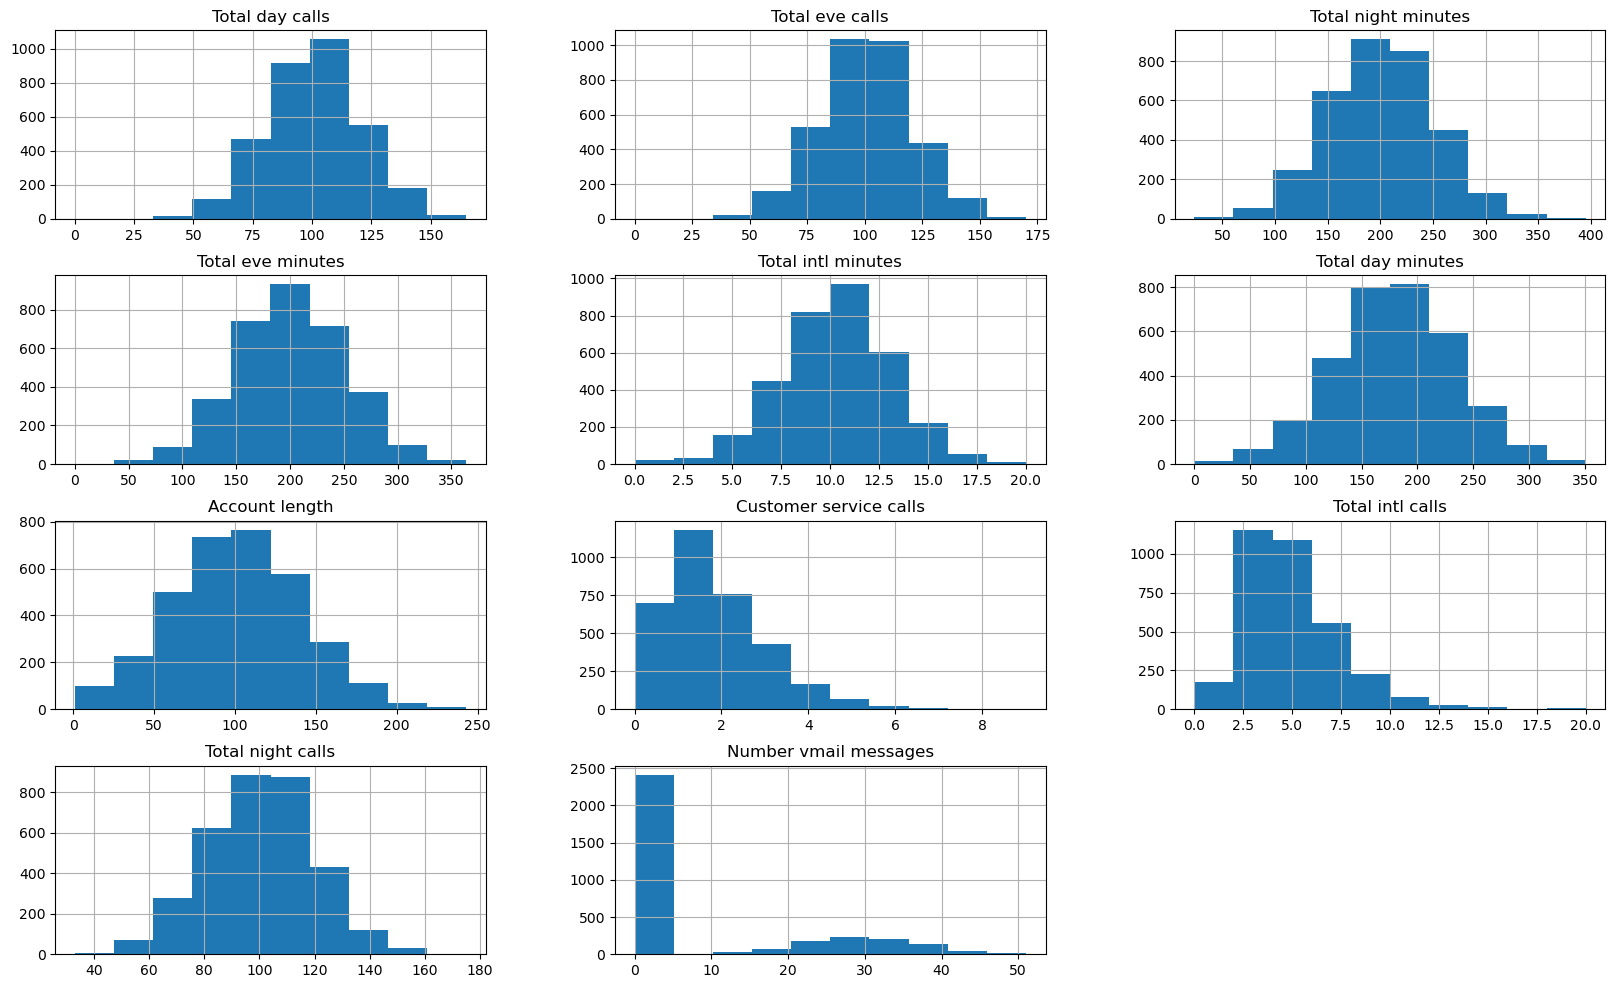

In [27]:
features = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
            "Churn",
        ]
    )
)

df[features].hist(figsize=(20, 12));

Дальше посмотрим, как признаки связаны с целевым – с оттоком.

Построим boxplot-ы, описывающее статистики распределения количественных признаков в двух группах: среди лояльных и ушедших клиентов.

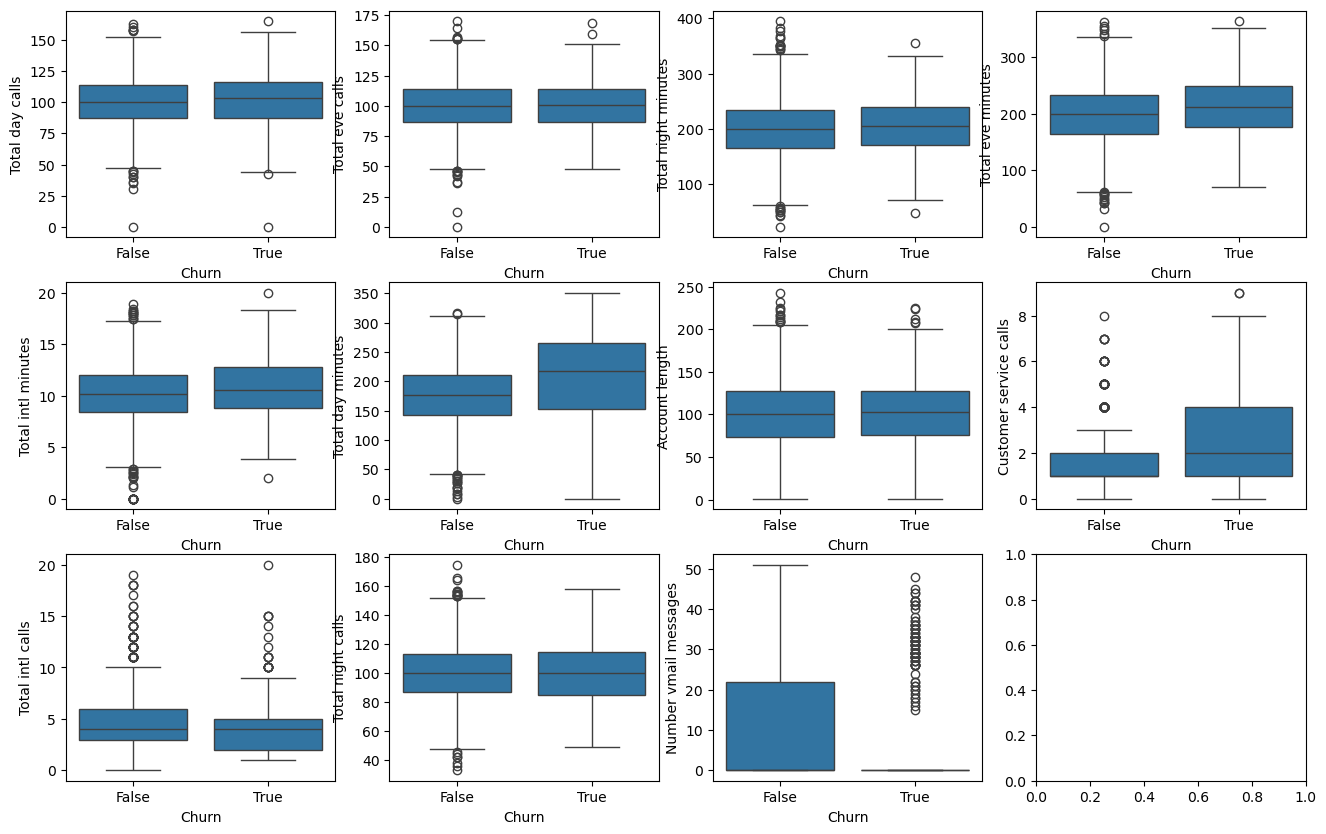

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))

for idx, feat in enumerate(features):
    sns.boxplot(data=df, x="Churn", y=feat, ax=axes[idx // 4, idx % 4])
    #axes[idx // 4, idx % 4].legend()
    axes[idx // 4, idx % 4].set_xlabel("Churn")
    axes[idx // 4, idx % 4].set_ylabel(feat)

    

На глаз наибольшее отличие мы видим для признаков Total day minutes, Customer service calls и Number vmail messages. Впоследствии мы научимся определять важность признаков в задаче классификации с помощью случайного леса (или градиентного бустинга), и окажется, что первые два – действительно очень важные признаки для прогнозирования оттока.

Посмотрим отдельно на картинки с распределением кол-ва проговоренных днем минут среди лояльных/ушедших. Слева - знакомые нам боксплоты, справа – сглаженные гистограммы распределения числового признака в двух группах (скорее просто красивая картинка, все и так понятно по боксплоту).

Интересное наблюдение: в среднем ушедшие клиенты больше пользуются связью. Возможно, они недовольны тарифами, и одной из мер борьбы с оттоком будет понижение тарифных ставок (стоимости мобильной связи). Но это уже компании надо будет проводить дополнительный экономический анализ, действительно ли такие меры будут оправданы.

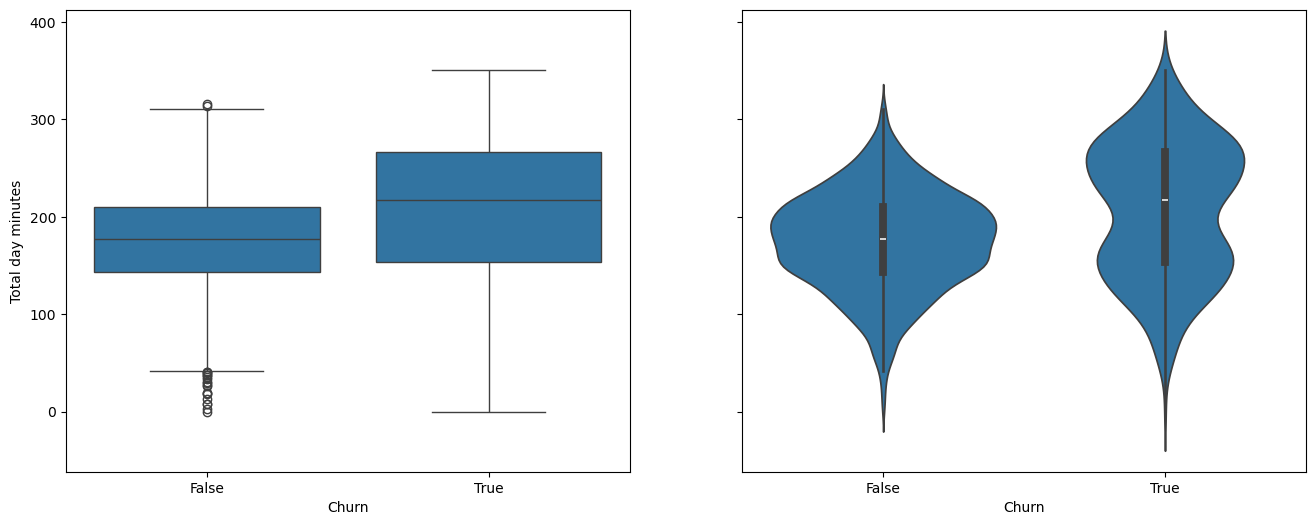

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

Теперь изобразим распределение числа обращений в сервисный центр (такую картинку мы строили в первой статье). Тут уникальных значений признака не много (признак можно считать как количественным целочисленным, так и порядковым), и наглядней изобразить распределение с помощью countplot. Наблюдение: доля оттока сильно возрастает начиная с 4 звонков в сервисный центр.

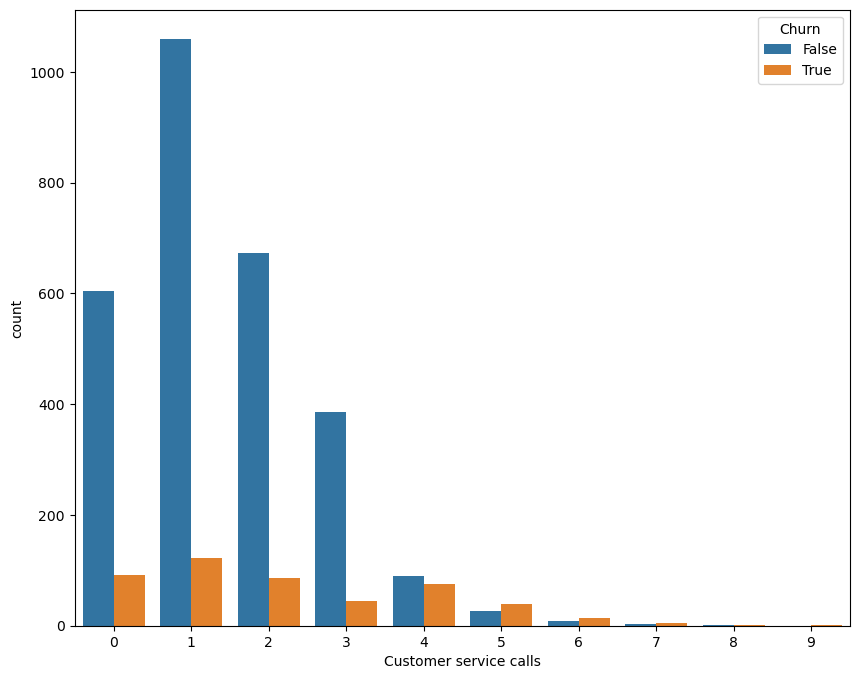

In [31]:
sns.countplot(x='Customer service calls', hue="Churn",data=df);

Теперь посмотрим на связь бинарных признаков International plan и Voice mail plan с оттоком. Наблюдение: когда роуминг подключен, доля оттока намного выше, т.е. наличие междунароного роуминга – сильный признак. Про голосовую почту такого нельзя сказать.

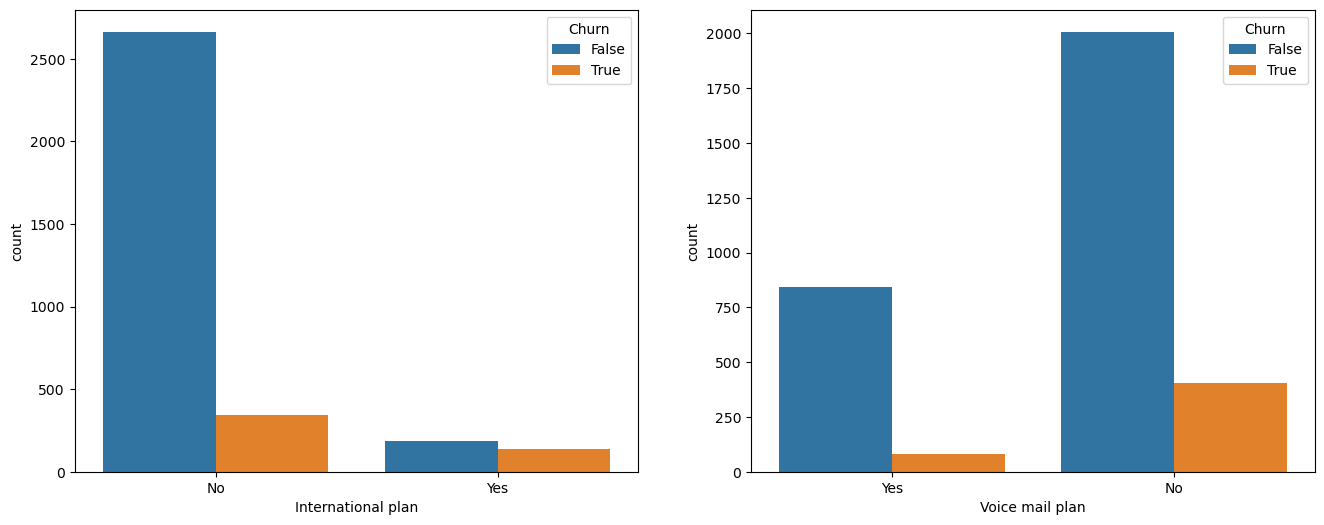

In [33]:
_, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

Наконец построим t-SNE представление данных. Название метода сложное – t-distributed Stohastic Neighbor Embedding, математика тоже крутая (и вникать в нее не будем), но основная идея проста, как дверь: найдем такое отображение из многомерного признакового пространства на плоскость (или в 3D, но почти всегда выбирают 2D), чтоб точки, которые были далеко друг от друга, на плоскости тоже оказались удаленными, а близкие точки – также отобразились на близкие. То есть neighbor embedding – это своего рода поиск нового представления данных, при котором сохраняется соседство.

In [35]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [37]:
X = df.drop(['Churn', "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
%%time

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: total: 40.3 s
Wall time: 7.61 s


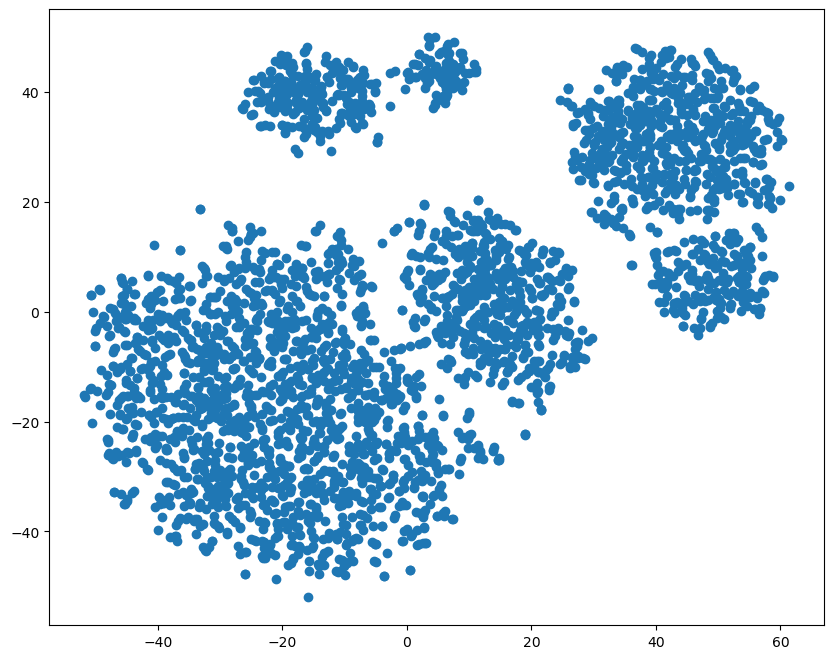

In [45]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

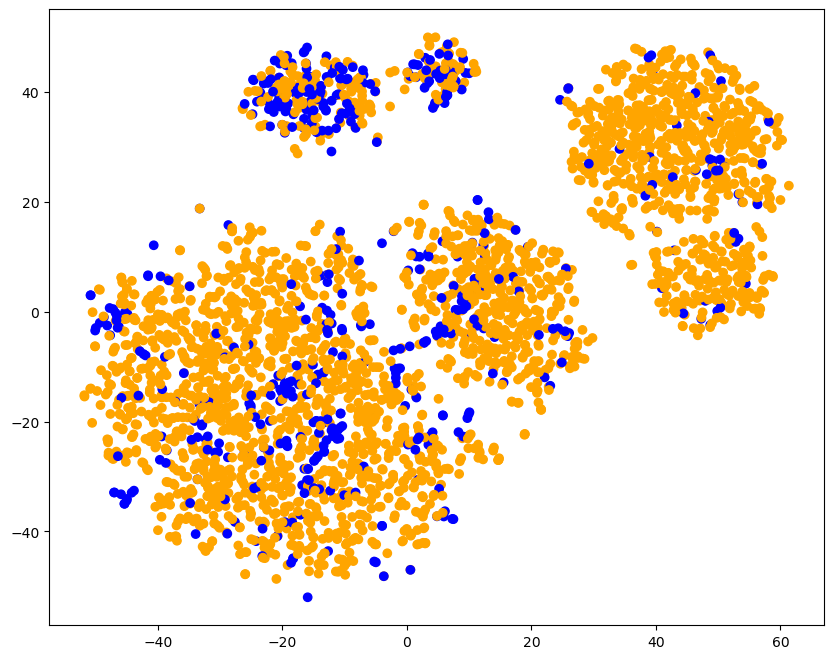

In [48]:
plt.scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["Churn"].map({True: "blue", False: "orange"}),
);

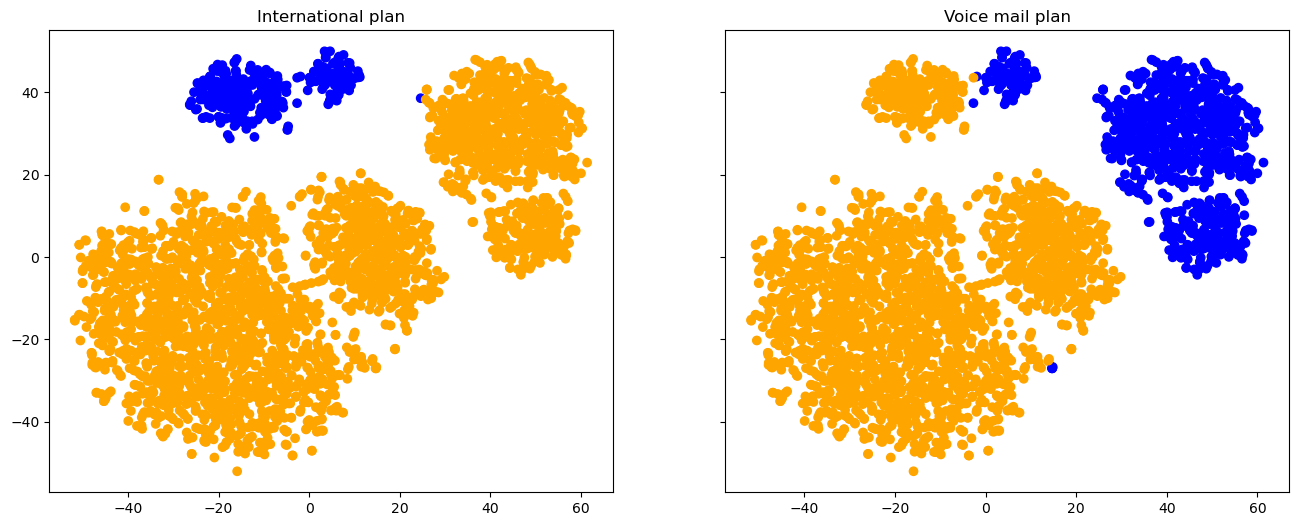

In [49]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

axes[0].scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["International plan"].map({"Yes": "blue", "No": "orange"}),
)
axes[1].scatter(
    tsne_representation[:, 0],
    tsne_representation[:, 1],
    c=df["Voice mail plan"].map({"Yes": "blue", "No": "orange"}),
)
axes[0].set_title("International plan")
axes[1].set_title("Voice mail plan");